### 심부전증 자료
- heart_failure_clinical_records_dataset.csv
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
- 각 파일의 컬럼은 아래와 같습니다.
   - age: 환자의 나이
   -  anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
   -  creatinine_phosphokinase: 크레아틴키나제 검사 결과
   -  diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
   -  ejection_fraction: 박출계수 (%)
   -  high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
   -  platelets: 혈소판 수 (kiloplatelets/mL)
   -  serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
   -  serum_sodium: 혈중 나트륨 레벨 (mEq/L)
   -  sex: 성별 (0: 여성, 1: 남성)
   -  smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
   -  time: 관찰 기간 (일)
   -  DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='age', ylabel='Count'>

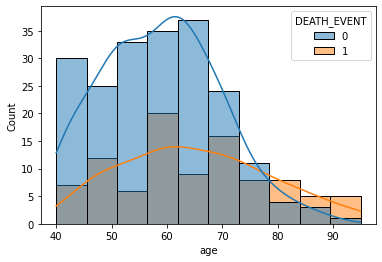

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

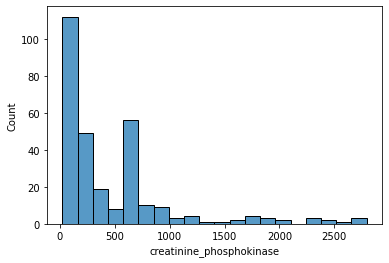

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

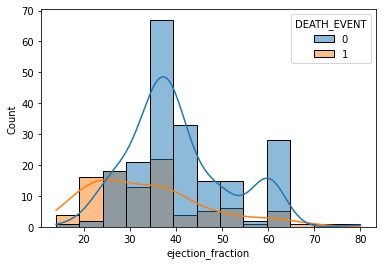

In [ ]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

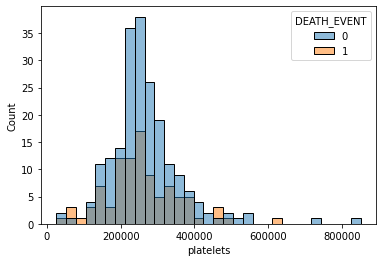

In [ ]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='time', ylabel='Count'>

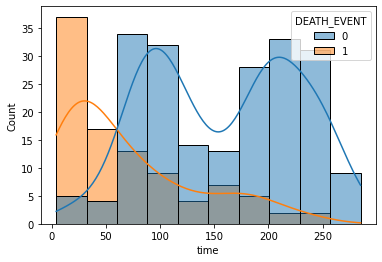

In [ ]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

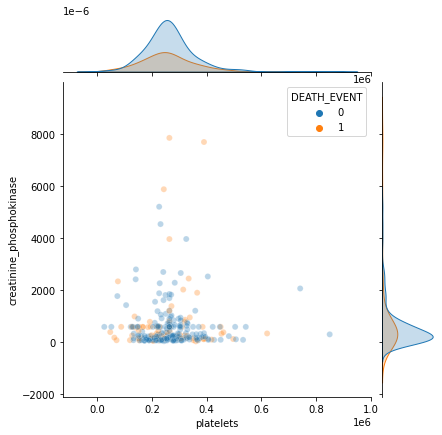

In [ ]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

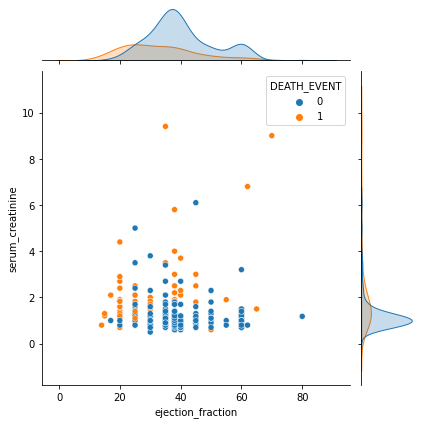

In [ ]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

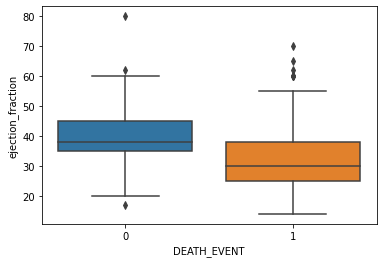

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

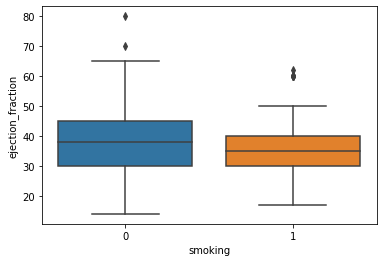

In [ ]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

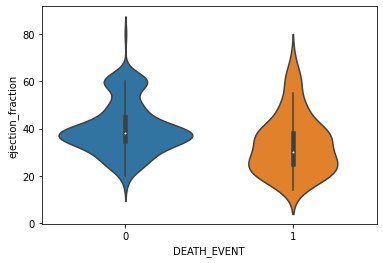

In [ ]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

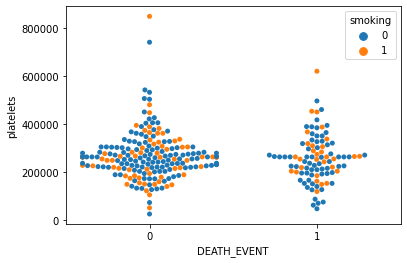

In [ ]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

### 모델학습에 필요한 데이터 전처리

In [ ]:
# creatinine_phosphokinase, ejection_fraction, high_blood_pressure는 변수명이 너무 길어서 각각 ck, ef, high_bp로 바꿈

df.rename(columns={'creatinine_phosphokinase':'ck',
                   'ejection_fraction':'ef',
                   'high_blood_pressure':'high_bp'}, inplace=True)

In [ ]:
X_num = df[['age', 'ck', 'ef', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_bp', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scale = scaler.transform(X_num)

X_scale1 = pd.DataFrame(data=X_scale, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scale1, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#  solver에 데이터셋이 작을 때 성능이 좋은lilinear 사용
y_preds=model.predict(x)
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score
y_preds=model_lr.predict(X_test)
print(accuracy_score(y_test, y_preds)) #1.0 #정확도

0.7555555555555555


[[59  5]
 [17  9]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



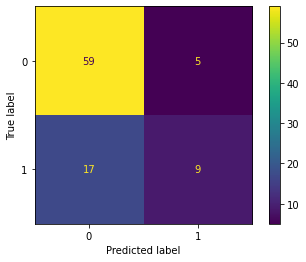

In [ ]:
## 분류리포트 제작하여서 f1스코어 확인
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_preds)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_lr.classes_)
disp.plot()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

### [임계값 조정]

- 지금의 데이터셋의 변수들을 바탕으로 로지스틱 모델을 만들 때 사망(DEATH_EVENT=1)으로의 예측을 좀 더 너그럽게 하면 로지스틱 모델의 성능이 조금 더 좋아질 수 있음

- 임계값을 디폴트인 0.5에서 0.45로 낮추면
- 정확도는 0.9로 유지한 상태에서 정밀도는 0.64에서 0.65, 재현율은 0.35에서 0.42, f1 스코어는 0.45에서 0.51로 개선할 수 있습니다.


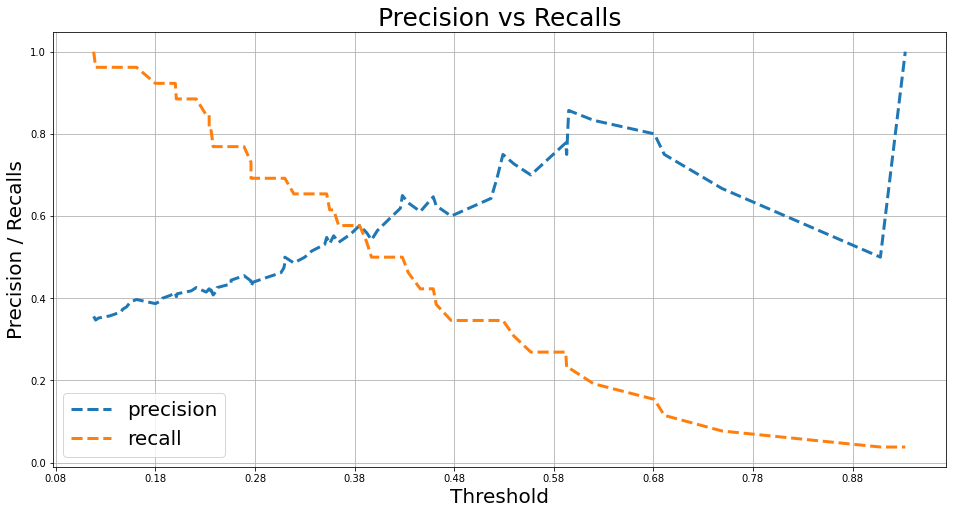

In [ ]:
# 사망시 재현율값이 0.35로서 매우 낮기 때문에 임계값을 조정해서 재현율값을 좀 더 향샹시킬 수 있는지 알아보겠습니다.

from sklearn.metrics import precision_recall_curve

# 모델 modle_lr의 label값이 1일 예측 확률 array를 추출합니다.
pred_probs_1 = model_lr.predict_proba(X_test)[:, 1]

# 실제 y_test값과 label값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력합니다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_probs_1)

# print(thresholds.shape)  # (73,)
# 반환된 임계값 array가 총 73개이므로 10건만 추출하기 위해서 4 step단위로 추출합니다.
thr_index = np.arange(0, thresholds.shape[0])
# print(thr_index)    # # [ 0  7 14 21 28 35 42 49 56 63 70]

# 7 step단위로 추출된 임계값에 따른 임계값 정밀도와 재현율값
thresholds = np.round(thresholds[thr_index], 3)
precisions = np.round(precisions[thr_index], 3)
recalls = np.round(recalls[thr_index], 3)

plt.figure(figsize=(16,8))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', linewidth=3, label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', linewidth=3, label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel('Threshold', fontsize=20)
plt.ylabel('Precision / Recalls', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.title('Precision vs Recalls', fontsize=25)
plt.grid()
plt.show()

In [ ]:
# threshold값 변화에 따른 classification report를 출력합니다.
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값
thr_list = [0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55]

for thr in thr_list:
    pred_probs_1 = model_lr.predict_proba(X_test)[:, 1].reshape(-1,1)
    binarizer = Binarizer(threshold=thr)
    binarizer.fit(pred_probs_1)
    pred = binarizer.transform(pred_probs_1)

    print('-------------------------- 임계값 : '+str(thr)+' -------------------------------')
    print(classification_report(y_test, pred))

-------------------------- 임계값 : 0.4 -------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        64
           1       0.57      0.50      0.53        26

    accuracy                           0.74        90
   macro avg       0.69      0.67      0.68        90
weighted avg       0.74      0.74      0.74        90

-------------------------- 임계값 : 0.425 -------------------------------
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90

-------------------------- 임계값 : 0.45 -------------------------------
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        64
           1       0.65    

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


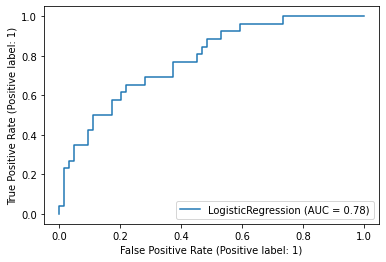

In [ ]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)


In [ ]:
# model_lr.predict_proba(X_test)[:, 1].reshape(-1,1)

model_lr.predict_proba(X_test)[:, 1].reshape(-1,1)

array([[0.27618886],
       [0.04581531],
       [0.45939205],
       [0.13436621],
       [0.29074131],
       [0.31887678],
       [0.35460578],
       [0.12291123],
       [0.22147555],
       [0.0244805 ],
       [0.30554931],
       [0.69108997],
       [0.26929881],
       [0.24239155],
       [0.16114081],
       [0.25566025],
       [0.14717233],
       [0.52940217],
       [0.10502398],
       [0.20096463],
       [0.36440534],
       [0.23383383],
       [0.03191577],
       [0.59522524],
       [0.06354011],
       [0.21560246],
       [0.0719066 ],
       [0.30939366],
       [0.12005997],
       [0.23762071],
       [0.02629979],
       [0.02494805],
       [0.1514219 ],
       [0.1797016 ],
       [0.90766056],
       [0.40343616],
       [0.52274232],
       [0.33016174],
       [0.15512547],
       [0.05611624],
       [0.93314966],
       [0.47666255],
       [0.41374302],
       [0.55665456],
       [0.37579327],
       [0.42778939],
       [0.27835397],
       [0.083